In [63]:
!pip install geopandas
!pip install folium matplotlib mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 1.1 MB/s eta 0:00:001.6 MB/s eta 0:00:01


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import folium
import glob

SyntaxError: invalid syntax (1209281260.py, line 6)

In [65]:
bestellung = pd.read_csv('gis_opex_international_bestellu.csv',sep=';') #orders
raw = pd.read_csv('gis_opex_international_raw.csv', sep=';') #transport-relevant information. 
raw_trac = pd.read_csv('gis_opex_international_raw_trac.csv', sep=';') #most relevant milestones along the supply chain
shiptrac = pd.read_csv('gis_opex_international_shiptrac.csv', sep=';') #ship data
ports = pd.read_csv('ports.csv', sep=';')#guess what

In [66]:
gpd.datasets.available 

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

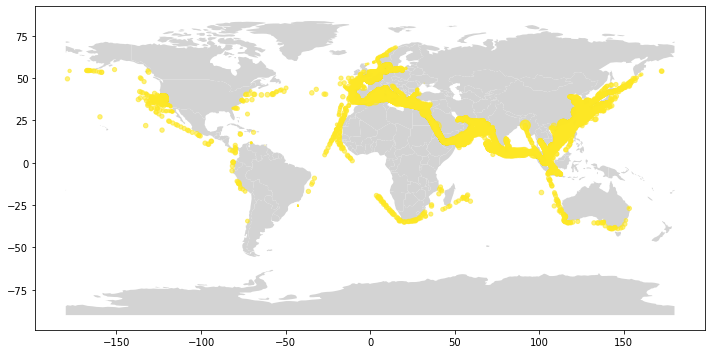

In [96]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
x = shiptrac['longitude']
y = shiptrac['latitude']
z = shiptrac['speed']
plt.scatter(x, y, s=z, c=z, alpha=0.6, vmin=0, vmax=0.01)

In [82]:
shiptrac.head()

,date,longitude,latitude,imo_number,course,speed,name,destination,eta
0,01.01.2021 20:48,39.06363,19.95656,9467251,332.0,18.7,CSCL VENUS,SUEZ CANAL,03.01.2021 13:00
1,01.01.2021 23:59,23.58858,37.95483,9229855,347.0,0.0,BERLIN EXPRESS,GRPIR>MTMAR,03.01.2021 04:00
2,02.01.2021 20:44,32.55820,29.82963,9702144,152.0,0.6,CMACGM GEORG FORSTER,SUEZ,02.01.2021 21:00
3,05.01.2021 12:56,46.44616,12.39946,9868314,254.0,17.5,HMM LE HAVRE,EGSUE,08.01.2021 19:00
4,31.12.2020 23:59,23.75718,37.44950,9229855,81.8,1.1,BERLIN EXPRESS,EGSUZ>GRPIR,31.12.2020 03:00


In [91]:
shiptrac

,date,longitude,latitude,imo_number,course,speed,name,destination,eta
0,01.01.2021 20:48,39.06363,19.95656,9467251,332.0,18.7,CSCL VENUS,SUEZ CANAL,03.01.2021 13:00
1,01.01.2021 23:59,23.58858,37.95483,9229855,347.0,0.0,BERLIN EXPRESS,GRPIR>MTMAR,03.01.2021 04:00
2,02.01.2021 20:44,32.55820,29.82963,9702144,152.0,0.6,CMACGM GEORG FORSTER,SUEZ,02.01.2021 21:00
3,05.01.2021 12:56,46.44616,12.39946,9868314,254.0,17.5,HMM LE HAVRE,EGSUE,08.01.2021 19:00
4,31.12.2020 23:59,23.75718,37.44950,9229855,81.8,1.1,BERLIN EXPRESS,EGSUZ>GRPIR,31.12.2020 03:00
...,...,...,...,...,...,...,...,...,...
173806,02.09.2022 13:49,12.62100,36.89929,9869198,288.5,15.4,HMM MIR,GBBRX,07.09.2022 19:30
173807,02.09.2022 13:57,37.31188,22.76261,9869227,329.8,17.2,HMM DAON,CNYTN->EGSUE,03.09.2022 19:00
173808,02.09.2022 07:42,113.85533,21.63657,9864227,190.0,19.3,ZEPHYR LUMOS,SGSIG,05.09.2022 19:00
173809,02.09.2022 12:18,55.50224,12.93920,9811012,284.8,12.7,EVER GOLDEN,EGSUZ,09.09.2022 20:00


In [92]:
raw

,schiff,datum_abgang,datum_ankunft,bestellnummer,container,incoterm,incoterm_ort,pod_name,pod_land,pod_id,pol_name,pol_land,pol_id,imo_nr
0,MSC DIANA,08.01.2022 00:00,15.02.2022 00:00,0040090962,MRSU5995265,FOB,Ningbo,Rotterdam,NL,RTM,Ningbo,CN,NGB,9755933.0
1,HMM HANBADA,07.01.2022 00:00,06.02.2022 00:00,DG50788731,TCNU6199549,FOB,Nansha New Port,Rotterdam,NL,RTM,Yantian,CN,YTN,9869203.0
2,SALAHUDDIN,25.07.2022 00:00,30.08.2022 00:00,0040093190,TEMU1849451,FOB,Shanghai,Genoa,IT,GOA,Shanghai,CN,SHA,9708796.0
3,YM WHOLESOME,24.02.2022 00:00,02.04.2022 00:00,G4511750676,1044-4212-0.0,FOB,Nagoya,Rotterdam,NL,RTM,Nagoya,JP,NGO,9704611.0
4,YM WHOLESOME,24.02.2022 00:00,02.04.2022 00:00,G4511750024,1044-4212-0.0,FOB,Nagoya,Rotterdam,NL,RTM,Nagoya,JP,NGO,9704611.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37127,Seasmile,20.07.2022 00:00,04.09.2022 00:00,G4511946138,S00139018,FOB,Auckland,Hamburg,DE,HAM,Tauranga,NZ,TRG,NaN
37128,Seasmile,20.07.2022 00:00,04.09.2022 00:00,G4511946138,S00139018,FOB,Auckland,Hamburg,DE,HAM,Tauranga,NZ,TRG,NaN
37129,Seasmile,20.07.2022 00:00,04.09.2022 00:00,G4511946138,S00139018,FOB,Auckland,Hamburg,DE,HAM,Tauranga,NZ,TRG,NaN
37130,Seasmile,20.07.2022 00:00,04.09.2022 00:00,G4511946138,S00139018,FOB,Auckland,Hamburg,DE,HAM,Tauranga,NZ,TRG,NaN


In [94]:
ports

,portname,code,prttype,locprecision,latitude,longitude,iso3,iso3_op,country
0,Watsi-Genge,NaN,River,unknown,-0.94560,20.62966,COD,COD,Democratic Republic of the Congo
1,Charlotte (Skidegate),CASKI,Sea,accurate,53.24742,-132.00969,CAN,CAN,Canada
2,Homer,USHOI,Sea,accurate,59.60159,-151.41553,NaN,USA,NaN
3,Hartsdale,USHAS,Sea,accurate,40.70610,-74.00210,NaN,USA,NaN
4,Killingholme,GBKGH,Sea,accurate,53.64561,-0.21512,NaN,GBR,NaN
...,...,...,...,...,...,...,...,...,...
3577,Nishtun,YENIS,Sea,accurate,15.82170,52.19765,YEM,NaN,Yemen
3578,Saida Commercial Port,NaN,sea,accurate,33.55656,35.36527,LBN,NaN,Lebanon
3579,Sour Commercial Port,NaN,sea,accurate,33.27382,35.19796,LBN,NaN,Lebanon
3580,Aamshite Fuel Oil Port,NaN,sea,accurate,34.15434,35.63044,LBN,NaN,Lebanon


In [97]:
raw_trac

,container,schiff,sea_etd_pol,sea_eta_pod,sea_dat_ank_hafen,sea_dat_cont_entl,sea_dat_abf_hafen,sea_dat_ank_vz,pod_id,pod_name,pod_land
0,HLBU3284461,AL NASRIYAH,27.11.2020 00:00,12.01.2021 00:00,12.01.2021 00:00,13.01.2021 00:00,18.01.2021 00:00,NaN,NaN,NaN,NaN
1,MSKU6283599,MILAN MAERSK,24.11.2020 00:00,26.12.2020 00:00,29.12.2020 00:00,29.12.2020 00:00,22.01.2021 00:00,27.01.2021 00:00,NaN,NaN,NaN
2,MRKU0657914,MSC PALOMA,08.11.2020 00:00,10.12.2020 00:00,10.12.2020 00:00,11.12.2020 00:00,04.01.2021 00:00,06.01.2021 00:00,NaN,NaN,NaN
3,CGMU5409490,COSCO SHIPPING LIBRA,21.08.2020 00:00,06.10.2020 00:00,06.10.2020 00:00,06.10.2020 00:00,10.10.2020 00:00,19.10.2020 00:00,NaN,NaN,NaN
4,MRKU7869258,MSC NEW YORK,16.10.2020 00:00,11.12.2020 00:00,11.12.2020 00:00,12.12.2020 00:00,20.12.2020 00:00,31.12.2020 00:00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10521,CLHU4801524,YM FOUNTAIN,05.07.2022 00:00,30.07.2022 00:00,02.08.2022 00:00,02.08.2022 00:00,12.08.2022 00:00,31.08.2022 00:00,RTM,Rotterdam,NL
10522,MEDU7949584,MUNICH MAERSK,11.07.2022 00:00,26.08.2022 00:00,26.08.2022 00:00,27.08.2022 00:00,NaN,NaN,RTM,Rotterdam,NL
10523,MSMU1992340,MUMBAI MAERSK,06.07.2022 00:00,12.08.2022 00:00,12.08.2022 00:00,NaN,23.08.2022 00:00,NaN,RTM,Rotterdam,NL
10524,PONU1865787,MANILA MAERSK,05.07.2022 00:00,31.07.2022 00:00,31.07.2022 00:00,01.08.2022 00:00,16.08.2022 00:00,30.08.2022 00:00,RTM,Rotterdam,NL
